# Prediction of Subject based on Question (NLP)

In this project, we developed a machine learning model to predict the subject category of a given question using Natural Language Processing (NLP) techniques. This approach leverages various NLP preprocessing steps such as tokenization, stemming, and stop-word removal, followed by feature extraction methods like TF-IDF (Term Frequency-Inverse Document Frequency). The model is trained using classification algorithms and fine-tuned through hyperparameter optimization to accurately classify questions into predefined subject categories. This project demonstrates the application of advanced NLP methods to automate the categorization process, significantly improving the efficiency and accuracy of information retrieval in educational or customer support settings. The model's predictions can assist in better question routing, resource allocation, and personalized content delivery.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/question_nlp_data.csv')
df.head()

,eng,Subject
0,An anti-forest measure is\nA. Afforestation\nB...,Biology
1,"Among the following organic acids, the acid pr...",Chemistry
2,If the area of two similar triangles are equal...,Maths
3,"In recent year, there has been a growing\nconc...",Biology
4,Which of the following statement\nregarding tr...,Physics


In [ ]:
df.shape

(122519, 2)

In [ ]:
df.isna().sum()

eng        0
Subject    0
dtype: int64

In [ ]:
print ("Subject Categories")
print (df['Subject'].value_counts())

Subject Categories
Subject
Physics      38438
Chemistry    37767
Maths        33190
Biology      13124
Name: count, dtype: int64


In [ ]:
df['Subject'].unique()

array(['Biology', 'Chemistry', 'Maths', 'Physics'], dtype=object)

<Axes: xlabel='count', ylabel='Subject'>

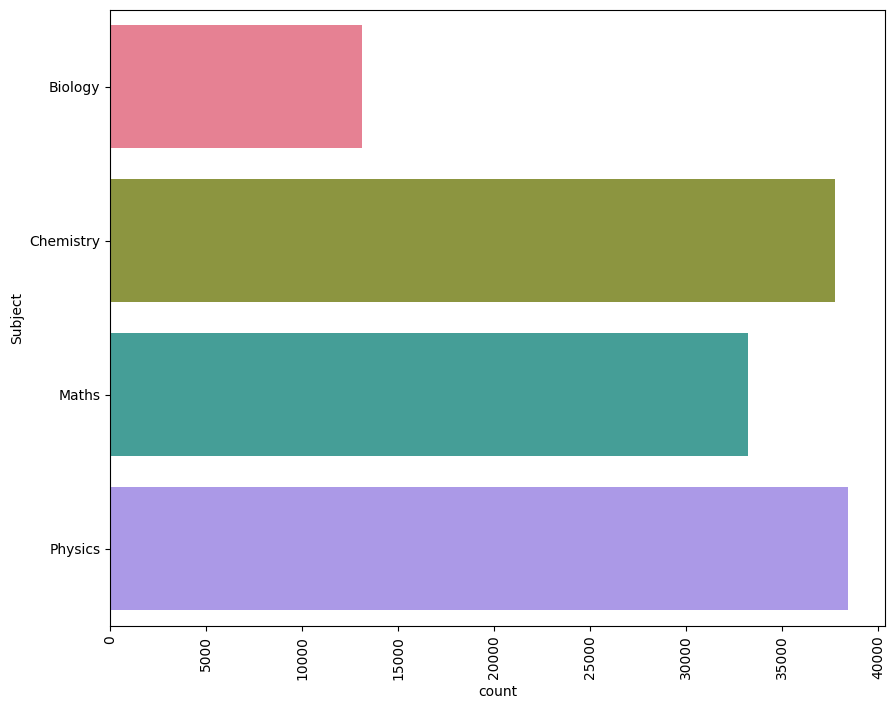

In [ ]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
palette = sns.color_palette("husl", len(df['Subject'].unique()))
sns.countplot(y="Subject", data=df, palette=palette)

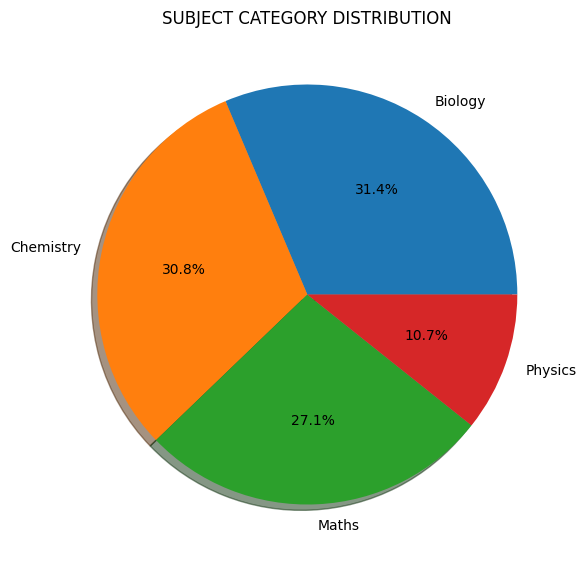

In [ ]:
from matplotlib.gridspec import GridSpec
targetCounts = df['Subject'].value_counts()
targetLabels  = df['Subject'].unique()

plt.figure(1, figsize=(15,15))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='SUBJECT CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()


# Data cleaning

In [ ]:
import re
def cleaning(text):
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ', text)
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    return text

df['Cleaned_eng'] = df.eng.apply(lambda x: cleaning(x))

In [ ]:
df

,eng,Subject,Cleaned_eng
0,An anti-forest measure is\nA. Afforestation\nB...,Biology,An anti forest measure is A Afforestation B Se...
1,"Among the following organic acids, the acid pr...",Chemistry,Among the following organic acids the acid pre...
2,If the area of two similar triangles are equal...,Maths,If the area of two similar triangles are equal...
3,"In recent year, there has been a growing\nconc...",Biology,In recent year there has been a growing concer...
4,Which of the following statement\nregarding tr...,Physics,Which of the following statement regarding tra...
...,...,...,...
122514,Which of the following group of\ncharacters is...,Biology,Which of the following group of characters is ...
122515,Light year is the\nA. light emitted by the sun...,Physics,Light year is the A light emitted by the sun i...
122516,Member of Dipnoi are native of\nA. India.\nB. ...,Biology,Member of Dipnoi are native of A India B Afric...
122517,"In one average-life,\nA. half the active nucle...",Physics,In one average life A half the active nuclei d...


In [ ]:
df.reset_index(inplace=True,drop=True)

In [ ]:
df.shape

(122519, 3)

In [ ]:
df['eng'][7]

'The sides of a right angled triangle are in A.P. The ratio of sides is\nA .1: 2: 3\nB. 2:3:4\n\\( c \\cdot 3: 4: 5 \\)\n\\( D \\cdot 5: 8: 3 \\)'

In [ ]:
df['Cleaned_eng'][7]

'The sides of a right angled triangle are in A P The ratio of sides is A 1 2 3 B 2 3 4 c cdot 3 4 5 D cdot 5 8 3 '

In [ ]:
# Removing the numeric values

new_text1 = []
for i in range(len(df['Cleaned_eng'])):
    text1=re.sub('[^a-zA-Z]', ' ', df['Cleaned_eng'][i])
    new_text1.append(text1)

In [ ]:
new_text1[7]

'The sides of a right angled triangle are in A P The ratio of sides is A       B       c cdot       D cdot       '

In [ ]:
# Removing the spaces

new_text2 = []
for i in range(len(new_text1)):
    text2=new_text1[i].strip()
    new_text2.append(text2)

In [ ]:
new_text2[7]

'The sides of a right angled triangle are in A P The ratio of sides is A       B       c cdot       D cdot'

In [ ]:
# Setting all words to lowercase

new_text3 = []
for i in range(len(new_text2)):
    text3=new_text2[i].lower()
    new_text3.append(text3)

In [ ]:
new_text3[7]

'the sides of a right angled triangle are in a p the ratio of sides is a       b       c cdot       d cdot'

In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string

In [ ]:
# Stemming

snowball = SnowballStemmer('english')
lancaster = LancasterStemmer()
porter = PorterStemmer()

for stemmer in (snowball, lancaster, porter):
    new_text4 = [stemmer.stem(t) for t in new_text3]

In [ ]:
df['Extracted_Text'] = new_text4

In [ ]:
df

,eng,Subject,Cleaned_eng,Extracted_Text
0,An anti-forest measure is\nA. Afforestation\nB...,Biology,An anti forest measure is A Afforestation B Se...,an anti forest measure is a afforestation b se...
1,"Among the following organic acids, the acid pr...",Chemistry,Among the following organic acids the acid pre...,among the following organic acids the acid pre...
2,If the area of two similar triangles are equal...,Maths,If the area of two similar triangles are equal...,if the area of two similar triangles are equal...
3,"In recent year, there has been a growing\nconc...",Biology,In recent year there has been a growing concer...,in recent year there has been a growing concer...
4,Which of the following statement\nregarding tr...,Physics,Which of the following statement regarding tra...,which of the following statement regarding tra...
...,...,...,...,...
122514,Which of the following group of\ncharacters is...,Biology,Which of the following group of characters is ...,which of the following group of characters is ...
122515,Light year is the\nA. light emitted by the sun...,Physics,Light year is the A light emitted by the sun i...,light year is the a light emitted by the sun i...
122516,Member of Dipnoi are native of\nA. India.\nB. ...,Biology,Member of Dipnoi are native of A India B Afric...,member of dipnoi are native of a india b afric...
122517,"In one average-life,\nA. half the active nucle...",Physics,In one average life A half the active nuclei d...,in one average life a half the active nuclei d...


# Modelling

In [ ]:
df.drop(['eng','Cleaned_eng'],axis=1,inplace=True)

In [ ]:
df.head()

,Subject,Extracted_Text
0,Biology,an anti forest measure is a afforestation b se...
1,Chemistry,among the following organic acids the acid pre...
2,Maths,if the area of two similar triangles are equal...
3,Biology,in recent year there has been a growing concer...
4,Physics,which of the following statement regarding tra...


In [ ]:
print (df['Subject'].value_counts())

Subject
Physics      38438
Chemistry    37767
Maths        33190
Biology      13124
Name: count, dtype: int64


In [ ]:
# Label Encoding categorical values
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
df['Subject'] = label_encode.fit_transform(df['Subject'])

In [ ]:
df.head()

,Subject,Extracted_Text
0,0,an anti forest measure is a afforestation b se...
1,1,among the following organic acids the acid pre...
2,2,if the area of two similar triangles are equal...
3,0,in recent year there has been a growing concer...
4,3,which of the following statement regarding tra...


In [ ]:
df.dropna(inplace=True)
df.isna().sum()

Subject           0
Extracted_Text    0
dtype: int64

In [ ]:
# Feature extraction using TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = df['Extracted_Text'].values
y = df['Subject'].values


word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    max_features=1000,
    stop_words='english')
word_vectorizer.fit(requiredText)
x = word_vectorizer.transform(requiredText)

print ("Feature extraction completed .....")

Feature extraction completed .....


# Modelling

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size=0.3,
                                                 shuffle=True, stratify=y)
print(x_train.shape)
print(x_test.shape)

(85763, 1000)
(36756, 1000)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

kn = KNeighborsClassifier()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
xg = XGBClassifier()
lr = LogisticRegression()
sv = SVC()

models = [kn,rf,dt,xg,lr,sv]
dict1 = {}

for model in models:
  model.fit(x_train,y_train)
  y_preds_train = model.predict(x_train)
  y_preds = model.predict(x_test)
  dict1[model] = accuracy_score(y_test,y_preds)*100
  print(f"Training set accuracy for {model} : {accuracy_score(y_train,y_preds_train)*100}")
  print(f"Test set accuracy  : {accuracy_score(y_test,y_preds)*100}")
  print("-------------------------------------------------------")
  print(classification_report(y_test,y_preds))

Training set accuracy for KNeighborsClassifier() : 83.65962011590081
Test set accuracy  : 76.69496136685167
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.67      0.76     11532
           1       0.83      0.74      0.78     11330
           2       0.86      0.91      0.89      9957
           3       0.41      0.75      0.53      3937

    accuracy                           0.77     36756
   macro avg       0.74      0.77      0.74     36756
weighted avg       0.81      0.77      0.78     36756

Training set accuracy for RandomForestClassifier() : 97.86388069447197
Test set accuracy  : 86.49744259440637
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.87      0.88     11532
           1       0.84      0.86      0.85     11330
           2       0.90      0.93      0.92      9957
           3      

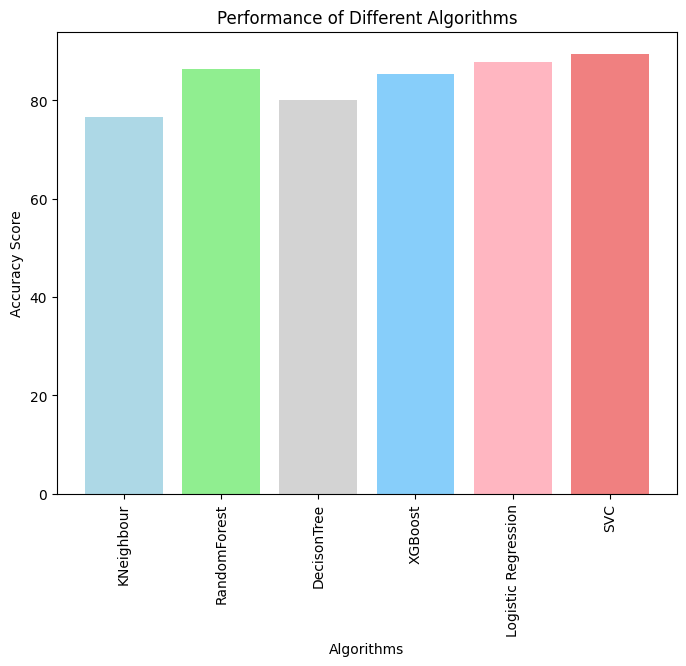

In [ ]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
plt.bar (x = ['KNeighbour','RandomForest','DecisonTree','XGBoost','Logistic Regression','SVC'] , height = dict1.values() , color = ['lightblue', 'lightgreen', 'lightgray', 'lightskyblue', 'lightpink', 'lightcoral'])

plt.title('Performance of Different Algorithms')
plt.xlabel ("Algorithms")
plt.ylabel ("Accuracy Score")
plt.show()

RandomForestClassifier performs better than other models with a Training Accuracy of 98% and a testing accuracy of 87%

In [ ]:
%%time

svc = SVC()
svc.fit(x_train,y_train)
print(f"Accuracy of SVC : {accuracy_score(y_test,y_preds)*100}")
print("----------------------------------------------")
print(classification_report(y_test,y_preds))

Accuracy of SVC : 89.51191642180868
----------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     11532
           1       0.88      0.89      0.88     11330
           2       0.94      0.95      0.94      9957
           3       0.77      0.79      0.78      3937

    accuracy                           0.90     36756
   macro avg       0.88      0.88      0.88     36756
weighted avg       0.90      0.90      0.90     36756

CPU times: user 13min 1s, sys: 996 ms, total: 13min 2s
Wall time: 13min 33s


In [ ]:
%%time

# Hyperparameter Tuning for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV



param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10,20],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}



rf_model = RandomForestClassifier()

rf_model = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=12,  # Number of parameter settings sampled
    scoring='accuracy',  # Evaluation metric
    cv=5,  # 5-fold cross-validation
    verbose=2,  # Verbosity level
    random_state=42,  # Reproducibility
    n_jobs=-1  # Use all available cores
)

rf_model.fit(x_train,y_train)
rf_model.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: user 3min 46s, sys: 2.83 s, total: 3min 49s
Wall time: 25min 28s


{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [ ]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


final_model = RandomForestClassifier(n_estimators= 200,
 min_samples_split = 10,
 min_samples_leaf = 2,
 max_features = 'auto',
 max_depth = None,
 bootstrap = False)


final_model.fit(x_train,y_train)
final_preds = final_model.predict(x_test)
print(f"Ideal model accuracy :{accuracy_score(y_test,final_preds)*100}")
print("------------------------------------------")
print(classification_report(y_test,final_preds))

Ideal model accuracy :85.86897377298945
------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      3937
           1       0.83      0.85      0.84     11330
           2       0.90      0.92      0.91      9957
           3       0.89      0.86      0.88     11532

    accuracy                           0.86     36756
   macro avg       0.84      0.84      0.84     36756
weighted avg       0.86      0.86      0.86     36756

CPU times: user 3min 38s, sys: 392 ms, total: 3min 39s
Wall time: 3min 40s
